In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
mpg = sns.load_dataset("mpg")

In [3]:
# Display the first few rows
print(mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [4]:
# Data Cleaning

In [5]:
# Check for missing values
missing_values = mpg.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [6]:
# Impute missing values (using median for numerical columns and mode for categorical)
numeric_cols = mpg.select_dtypes(include=[np.number]).columns
categorical_cols = mpg.select_dtypes(include=["object", "category"]).columns

for col in numeric_cols:
    mpg[col] = mpg[col].fillna(mpg[col].median())
for col in categorical_cols:
    mpg[col] = mpg[col].fillna(mpg[col].mode()[0])

In [7]:
# Remove duplicate rows
mpg = mpg.drop_duplicates()

In [ ]:
# Detect and fix outliers using IQR
Q1 = mpg[numeric_cols].quantile(0.25)
Q3 = mpg[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
mpg = mpg[~((mpg[numeric_cols] < (Q1 - 1.5 * IQR)) | (mpg[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
# Standardize categorical values
if 'origin' in mpg.columns:
    mpg['origin'] = mpg['origin'].astype(str).str.lower()
if 'name' in mpg.columns:
    mpg['name'] = mpg['name'].str.lower().str.strip()

In [10]:
# Exploratory Data Analysis (EDA)

In [11]:
## Univariate Analysis

In [12]:
# Summary statistics
summary_stats = mpg.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
               mpg   cylinders  displacement  horsepower       weight  \
count  380.000000  380.000000    380.000000  380.000000   380.000000   
mean    23.701579    5.386842    187.446053  101.276316  2933.168421   
std      7.509740    1.666157     98.133984   33.060849   822.759728   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     18.000000    4.000000    103.250000   76.000000  2219.750000   
50%     23.000000    4.000000    144.500000   92.500000  2764.500000   
75%     29.000000    6.000000    258.000000  115.000000  3521.250000   
max     44.600000    8.000000    429.000000  198.000000  5140.000000   

       acceleration  model_year  
count    380.000000  380.000000  
mean      15.638421   76.152632  
std        2.488570    3.617295  
min        9.500000   70.000000  
25%       14.000000   73.000000  
50%       15.500000   76.000000  
75%       17.125000   79.000000  
max       22.200000   82.000000  


In [13]:
# Frequency distributions for categorical variables
for col in categorical_cols:
    print(f"\nFrequency Distribution for {col}:")
    print(mpg[col].value_counts())


Frequency Distribution for origin:
origin
usa       236
japan      78
europe     66
Name: count, dtype: int64

Frequency Distribution for name:
name
ford pinto                6
toyota corolla            5
amc matador               5
ford maverick             5
toyota corona             4
                         ..
capri ii                  1
renault 12tl              1
dodge coronet brougham    1
chevrolet woody           1
chevy s-10                1
Name: count, Length: 292, dtype: int64


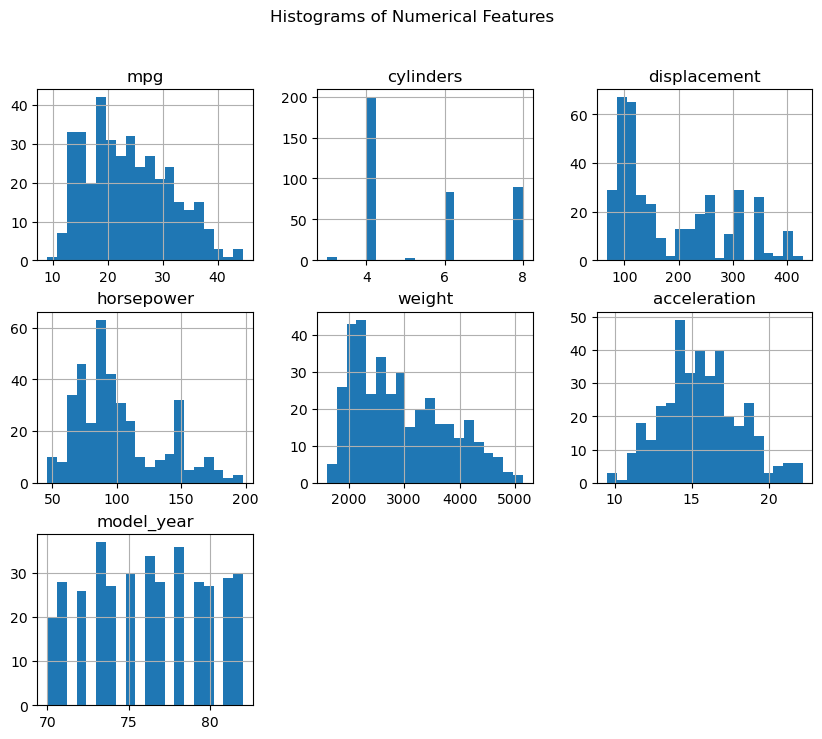

In [14]:
# Histograms
mpg.hist(figsize=(10,8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

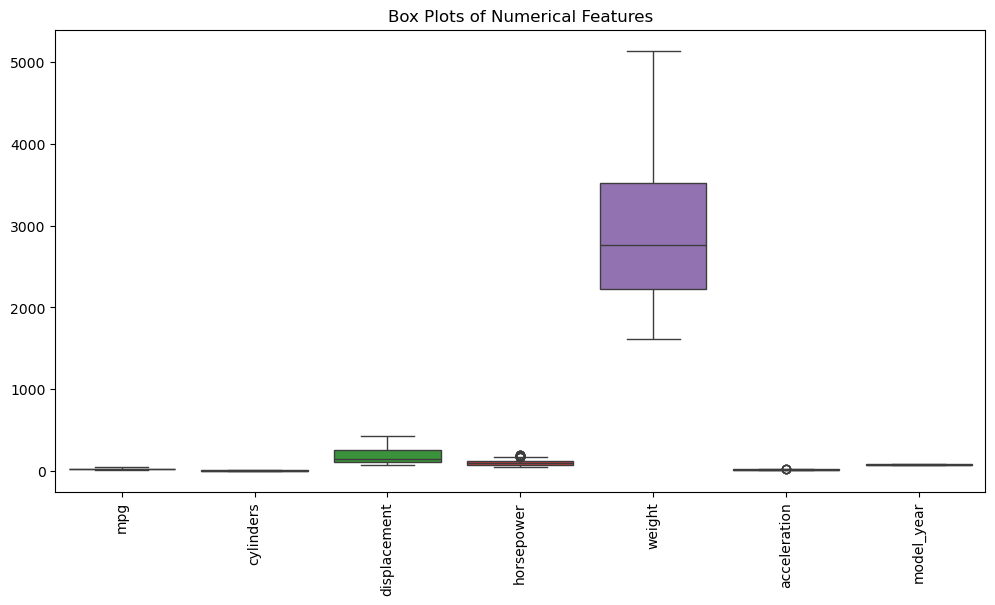

In [15]:
# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=mpg)
plt.xticks(rotation=90)
plt.title("Box Plots of Numerical Features")
plt.show()

In [16]:
## Bivariate Analysis

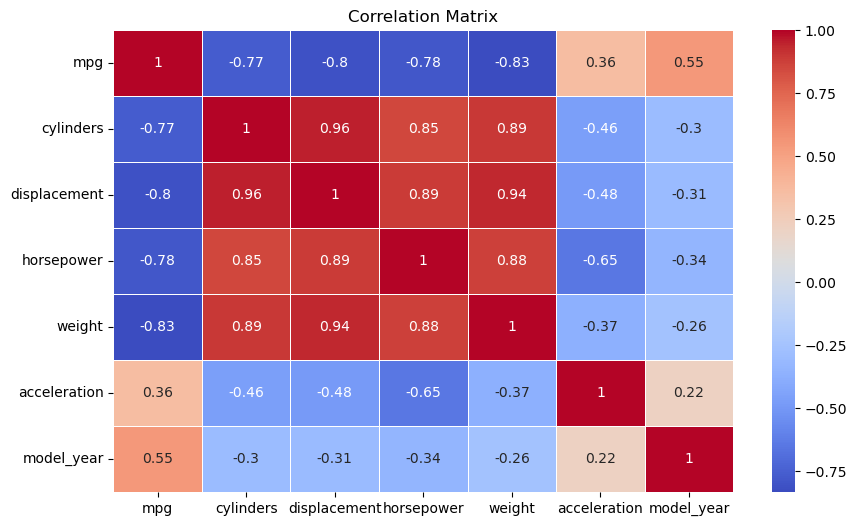

In [17]:
# Compute correlation matrix for numerical columns
corr_matrix = mpg[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

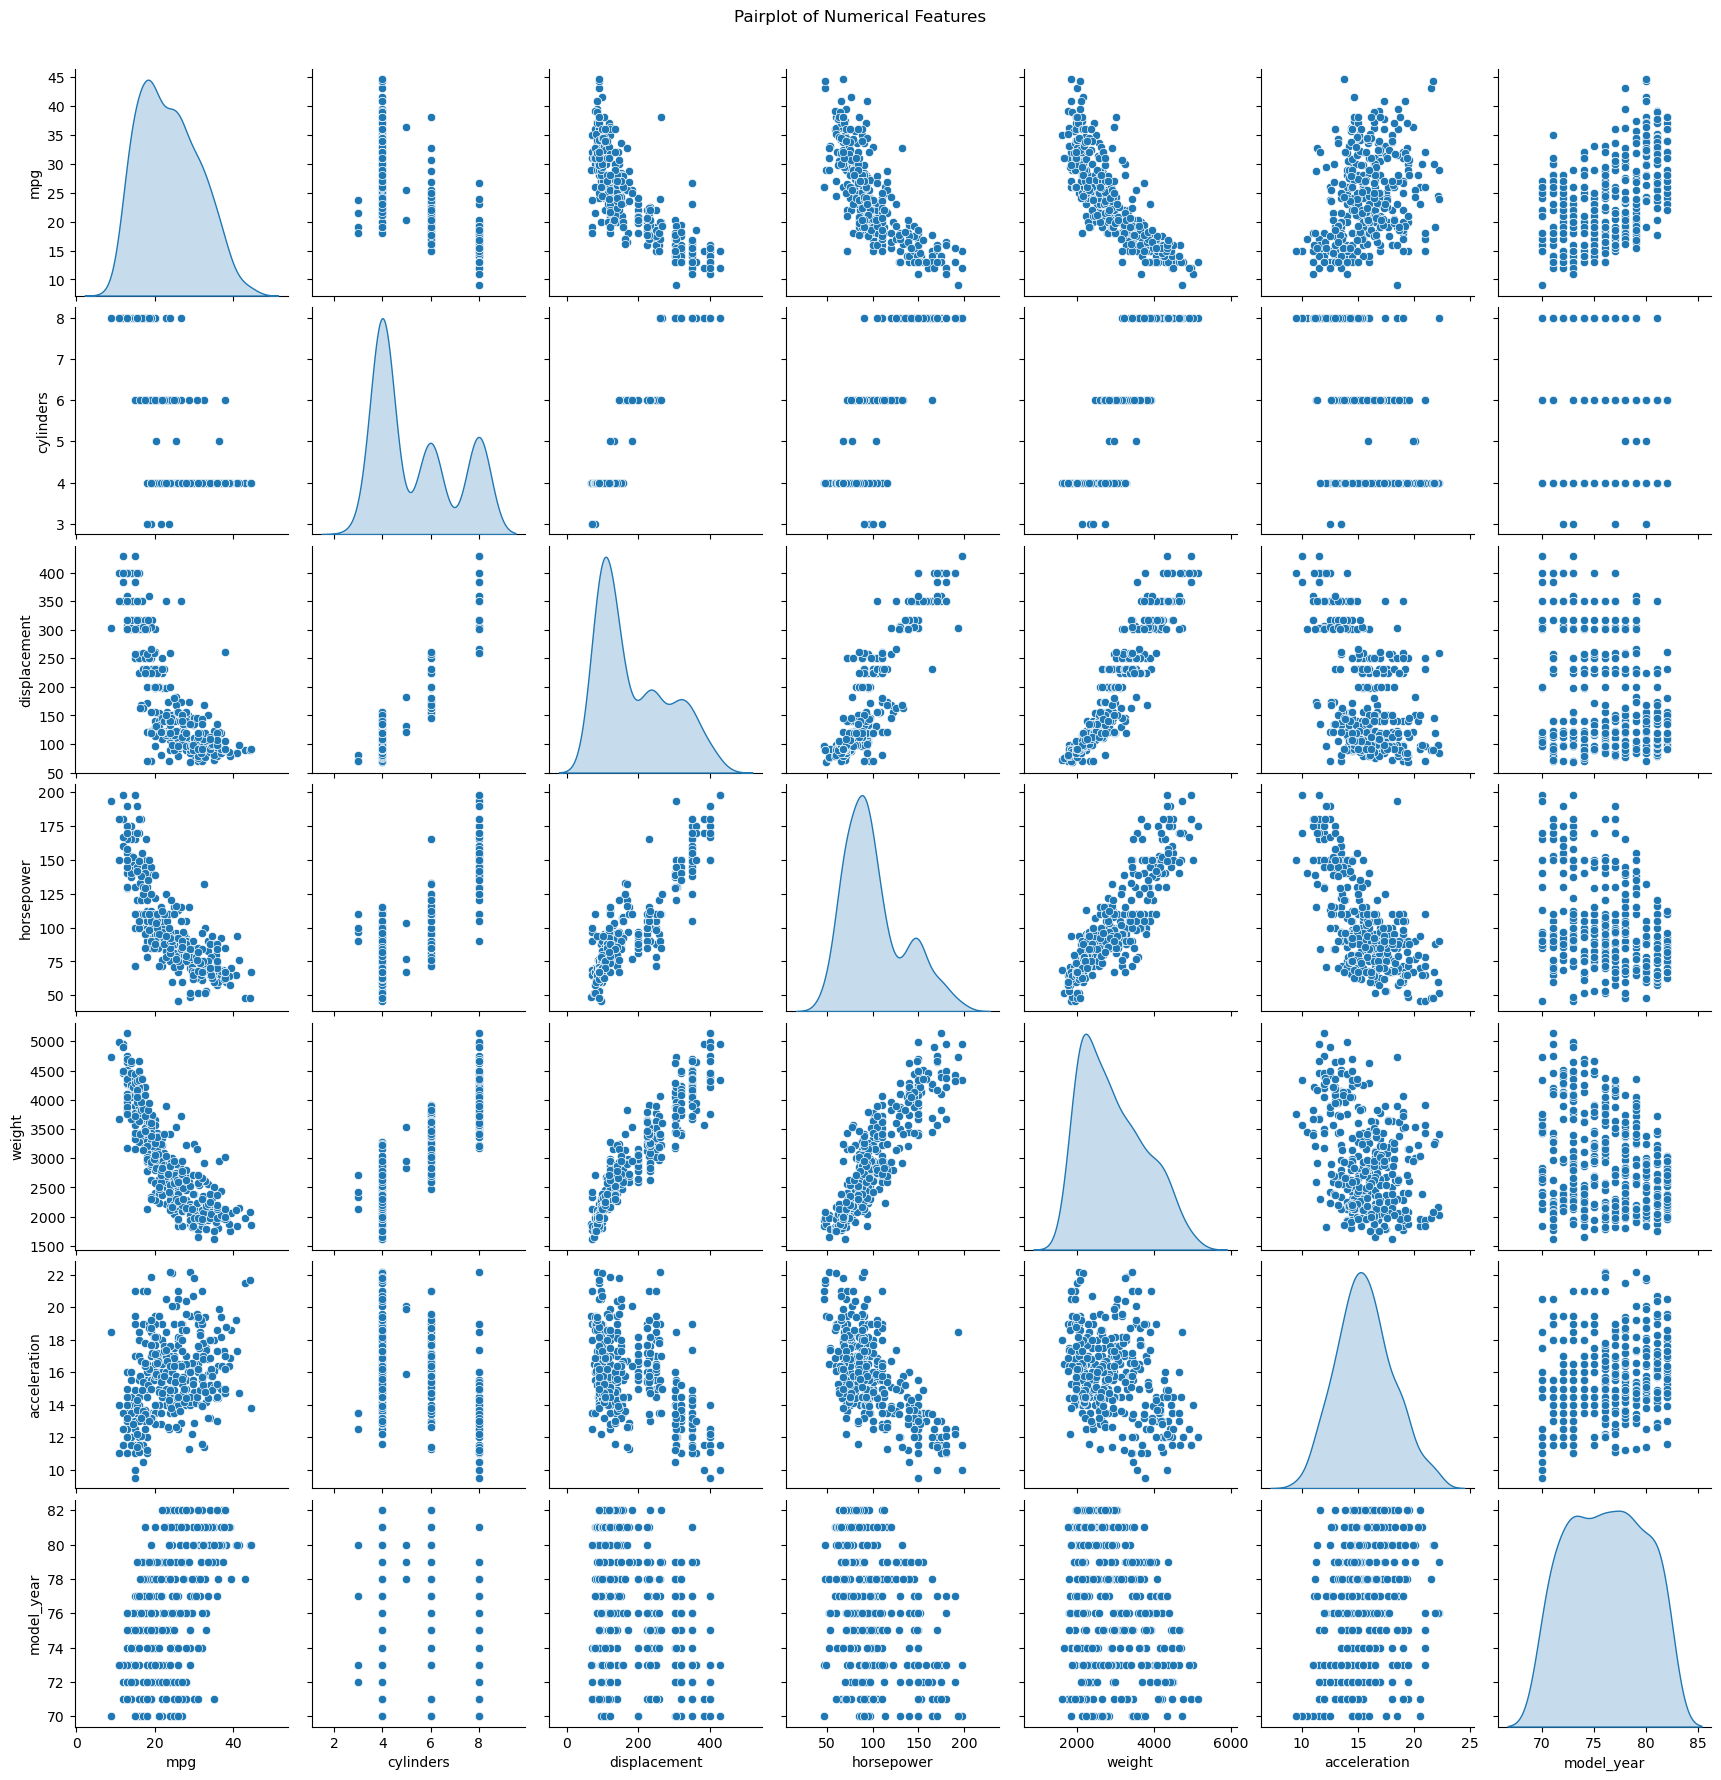

In [18]:
# Scatter plots for numerical variables
sns.pairplot(mpg[numeric_cols], diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

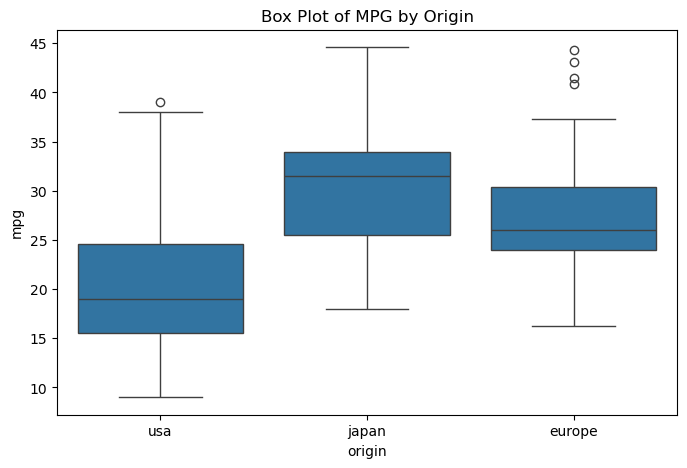

In [19]:
# Box plot of mpg by origin
if 'origin' in mpg.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='origin', y='mpg', data=mpg)
    plt.title("Box Plot of MPG by Origin")
    plt.show()

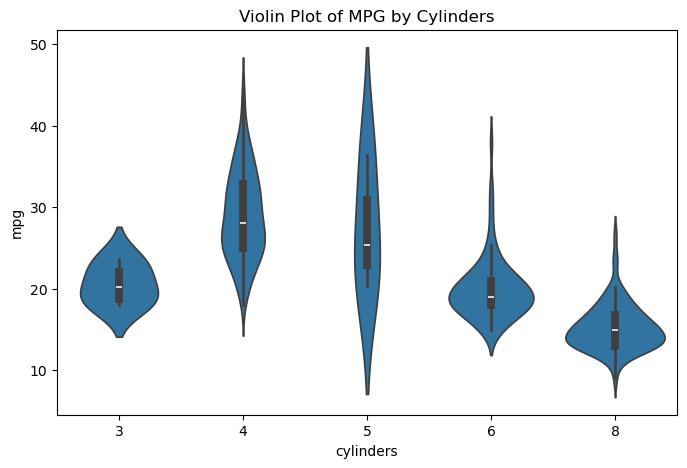

In [20]:
# Violin plot of mpg by cylinders
if 'cylinders' in mpg.columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='cylinders', y='mpg', data=mpg)
    plt.title("Violin Plot of MPG by Cylinders")
    plt.show()

In [21]:
## Multivariate Analysis

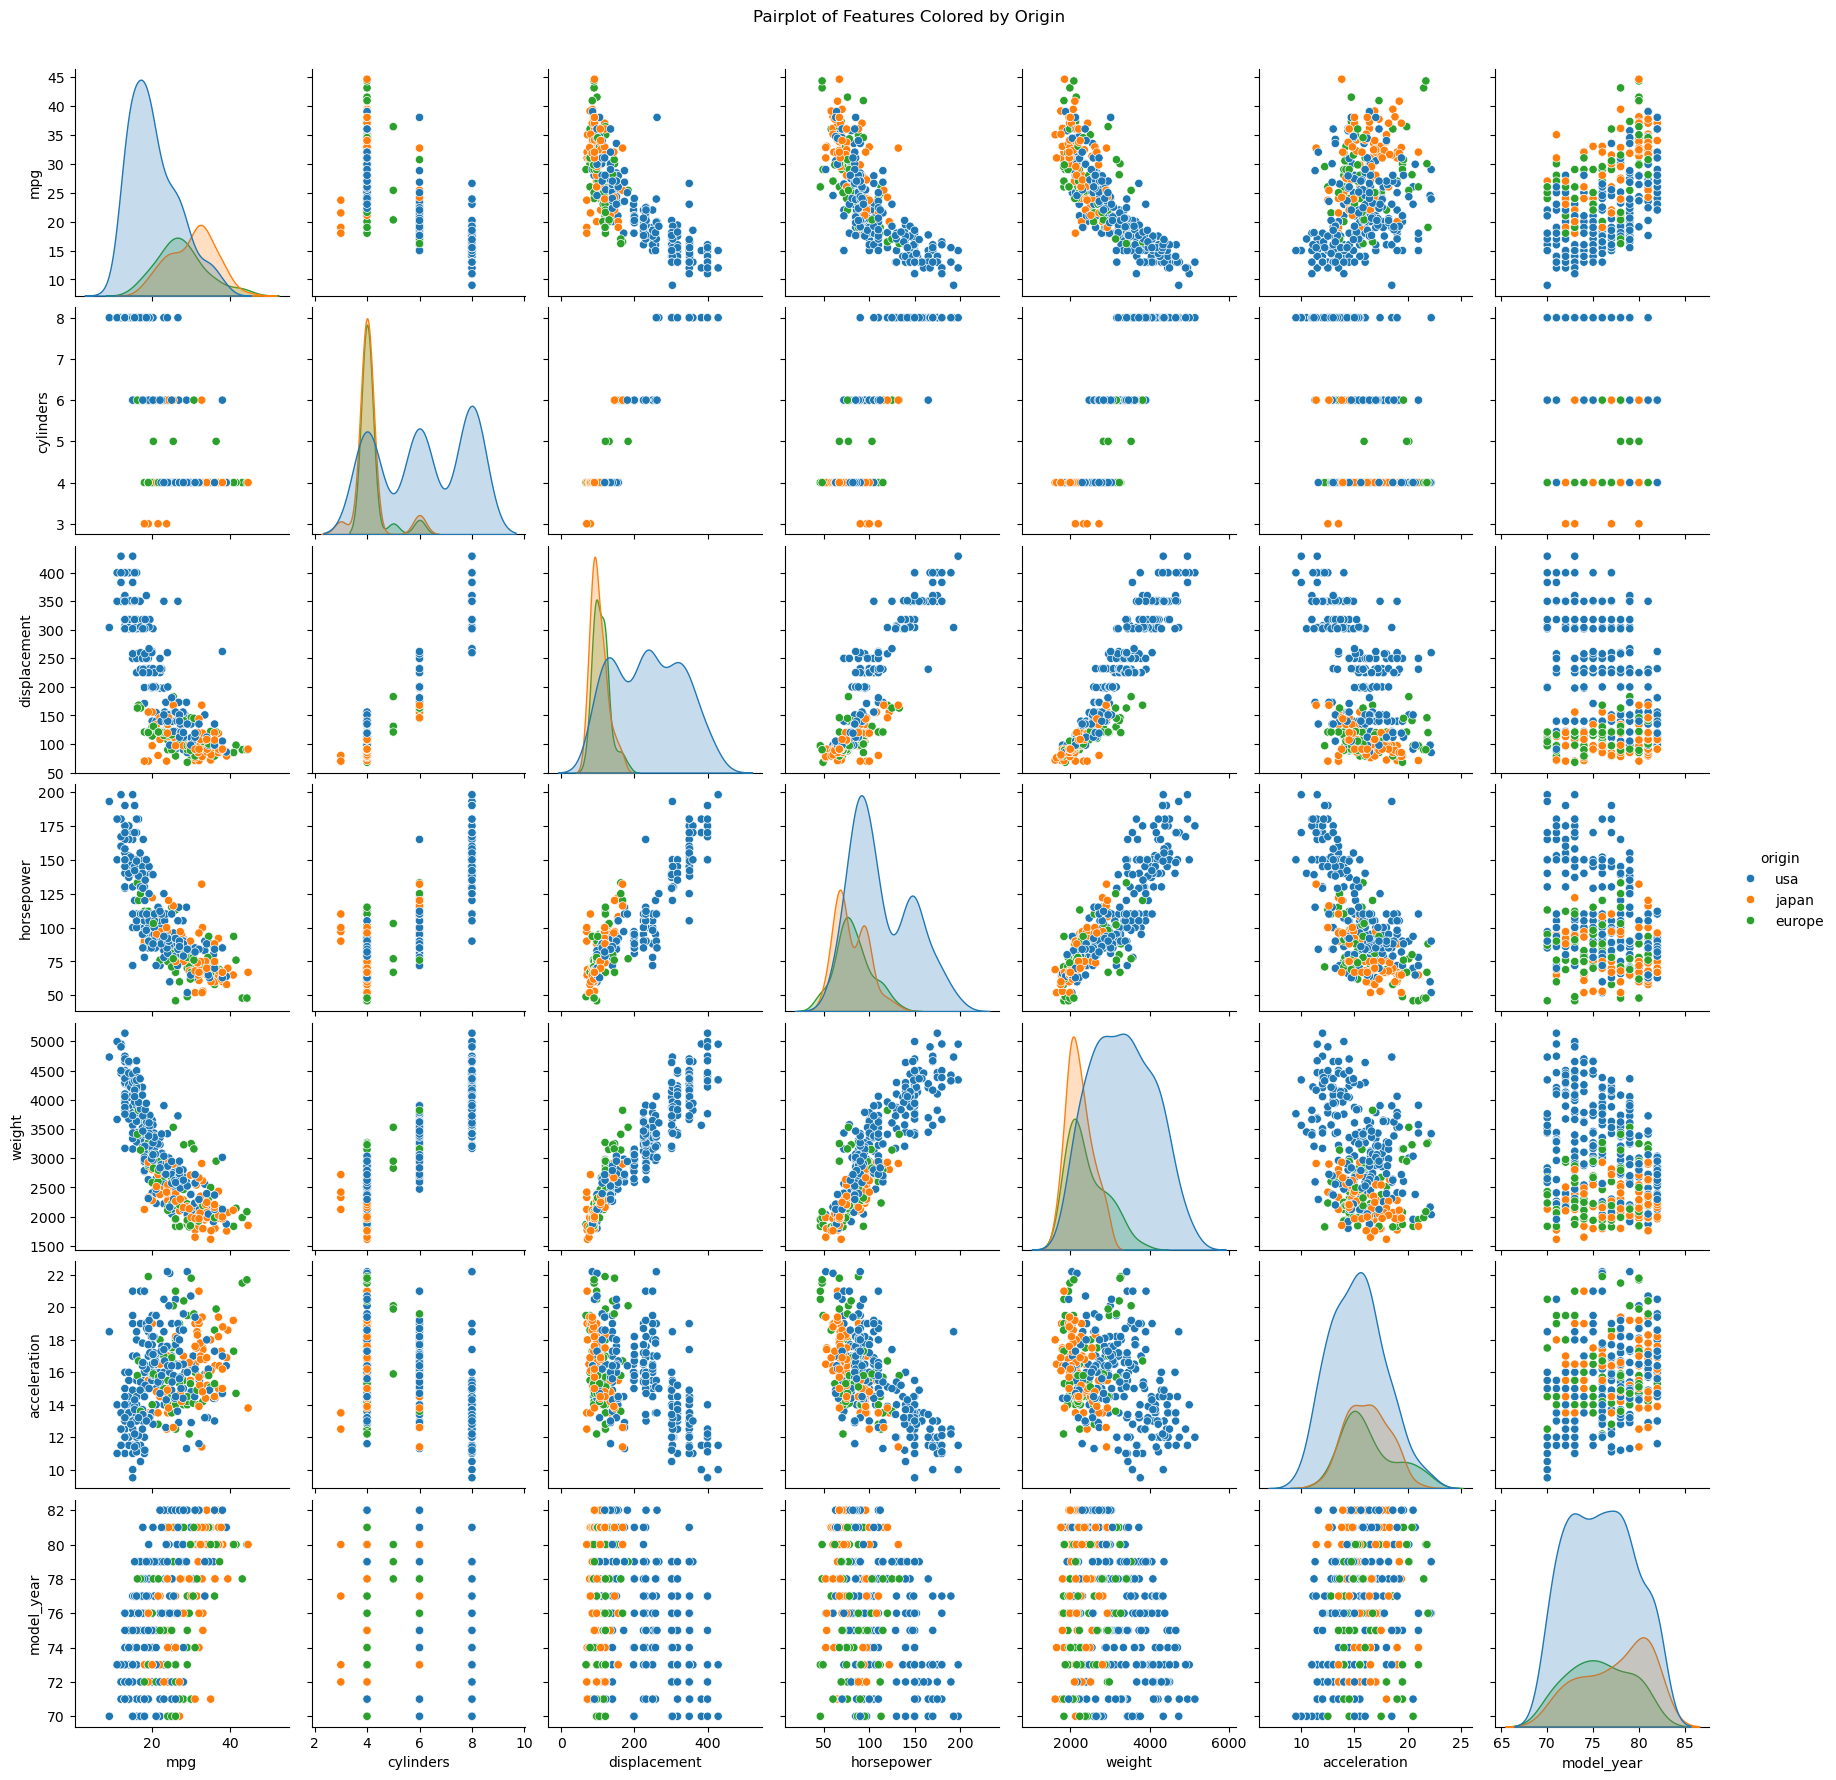

In [22]:
# Pair plots with hue based on origin
if 'origin' in mpg.columns:
    sns.pairplot(mpg, hue='origin', diag_kind='kde')
    plt.suptitle("Pairplot of Features Colored by Origin", y=1.02)
    plt.show()

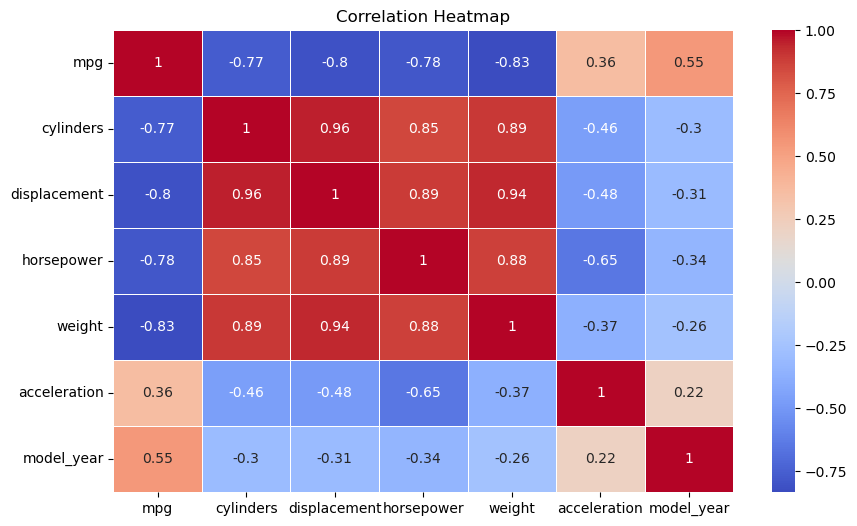

In [23]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

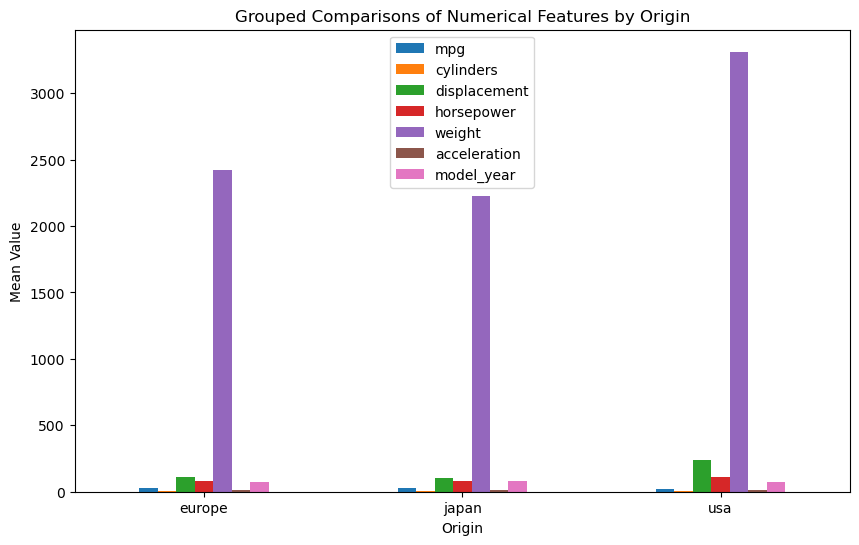

In [24]:
# Grouped comparisons
if 'origin' in mpg.columns:
    grouped_means = mpg.groupby('origin')[numeric_cols].mean()
    grouped_means.plot(kind='bar', figsize=(10,6))
    plt.title("Grouped Comparisons of Numerical Features by Origin")
    plt.ylabel("Mean Value")
    plt.xlabel("Origin")
    plt.xticks(rotation=0)
    plt.show()